## 데이터 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras # 딥러닝 lib
import sklearn  # 머신러닝 lib

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')  # 학습데이터
df_test = pd.read_csv('test.csv')  # 예측모델
df_submit = pd.read_csv('gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


**타이타닉 데이터 Feature**
- survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
- pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex - 성별
- Age - 나이(세)
- sibsp - 함께 탑승한 형제자매, 배우자 수 총합
- parch - 함께 탑승한 부모, 자녀 수 총합
- ticket - 티켓 넘버
- fare - 탑승 요금
- cabin - 객실 넘버
- bembarked - 탑승 항구

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# 결측값 확인
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df_submit.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [11]:
df_train.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


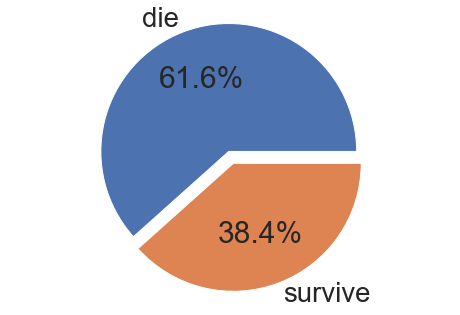

In [12]:
# survived 파악
die = df_train.groupby('Survived').count()['PassengerId'][0]
survive = df_train.groupby('Survived').count()['PassengerId'][1]
plt.pie([die, survive], labels=['die', 'survive'], autopct='%.1f%%', explode=(0.1, 0))
plt.axis('equal')
plt.show()

## 데이터 분석

### Pclass : 클래스에 따른 생존률 분석
- 클래스가 안 좋을수록 많이 죽음

In [13]:
# 클래스별 인원 수
df_train.groupby('Pclass').count()['Survived']

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [14]:
# 클래스 별 생존자 수
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()  # sum함수를 사용하면 생존은 1로 계산되므로 합을 통해 생존자 알 수 있다

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
# crosstab 사용
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [16]:
# 생존률
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

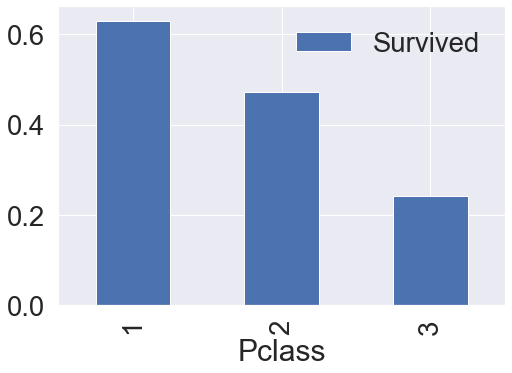

In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

### Sex : 성별에 따른 생존률 분석
- 남성이 여성보다 많이 죽음

In [18]:
df_train.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


<AxesSubplot:xlabel='Sex'>

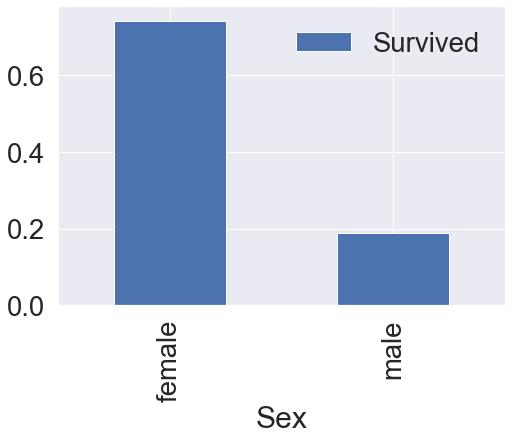

In [19]:
# 생존률은 여성이 높다
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar()

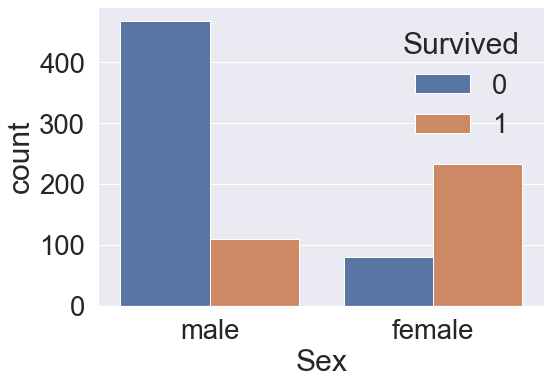

In [20]:
# 남성이 여성보다 생존률이 낮다
sns.countplot('Sex', hue='Survived', data=df_train)
plt.show()

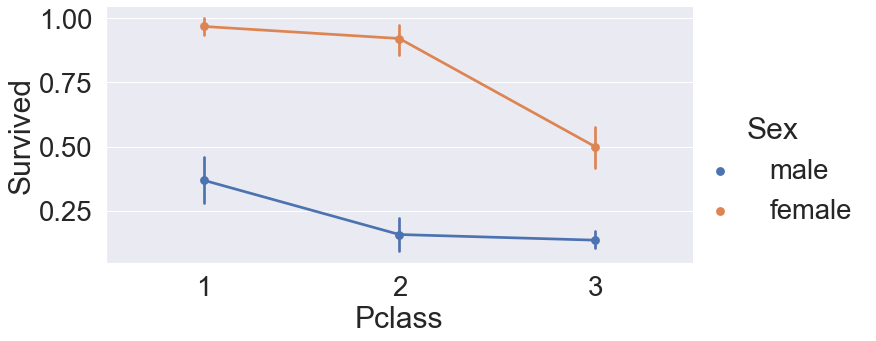

In [21]:
# 클래스별 남성과 여성의 생존률
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, aspect=2)

### Age : 연령별 생존률 분석
- 0~15세 생존률이 조금 더 높음
- 클래스가 높을수록 연령층이 높음

In [22]:
print(df_train['Age'].max()) # 가장 나이가 많은 승객
print(df_train['Age'].min()) # 가장 나이가 적은 승객
print(round(df_train['Age'].mean(), 2))  # 탑승객 평균 나이

80.0
0.42
29.7


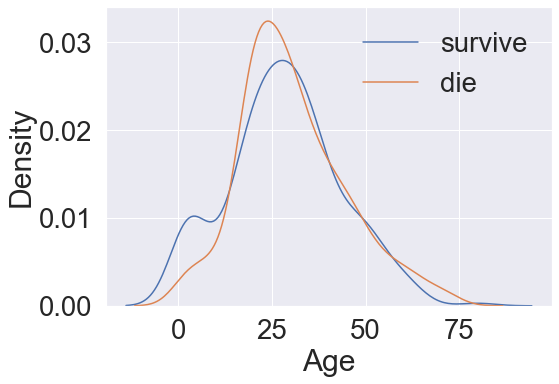

In [23]:
# 생존자 0~10세 사이에 조금 더 많다
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'])
plt.legend(['survive', 'die'])

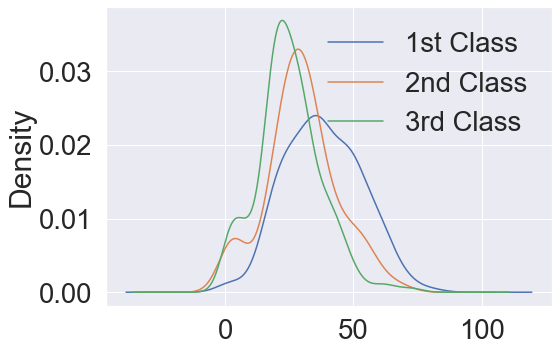

In [24]:
# 클래스 연령층
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

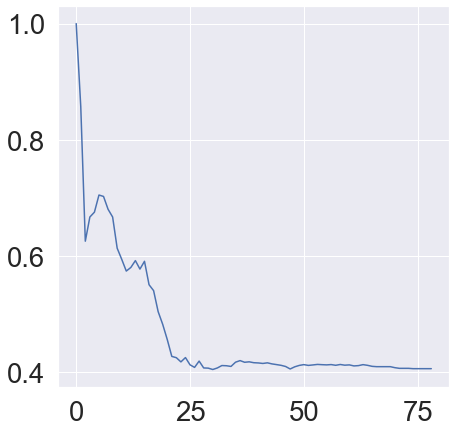

In [25]:
# 나이대 생존 확률 - 누적 확률
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.show()

### Embarked : 탑승한 항구에 따른 생존률

In [26]:
# 항구 명 알기
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked'>

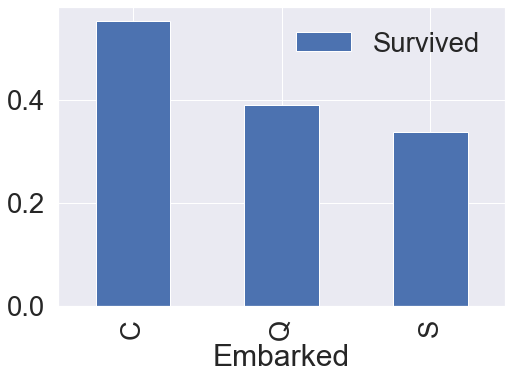

In [27]:
# 탐승한 항구에 따른 생존률
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

1. S 항구에서 가장 많은 사람이 탐승했다
2. S의 남성 탑승객이 여성보다 많고 다른 항구는 비슷하다
3. S 항구에서 탄 탑승객은 사망률이 높다(0:사망)
4. S 항구는 3 class가 가장 많다

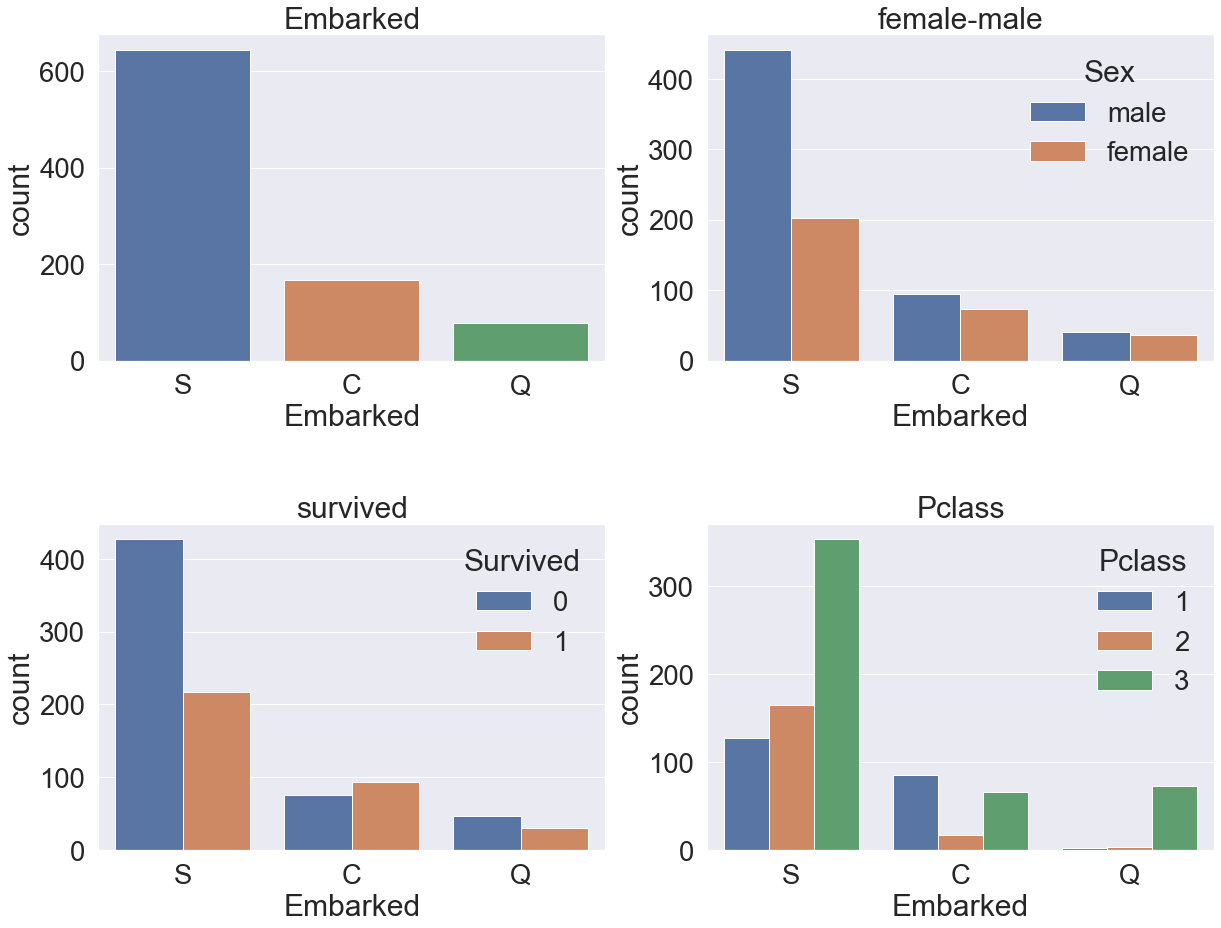

In [28]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0]).set_title('Embarked')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1]).set_title('female-male')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0]).set_title('survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1]).set_title('Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 표 간격
plt.show()

### Family (SibSp + Parch) : 형제, 자매, 부모, 자녀에 따른 생존률

In [29]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 

<AxesSubplot:xlabel='FamilySize'>

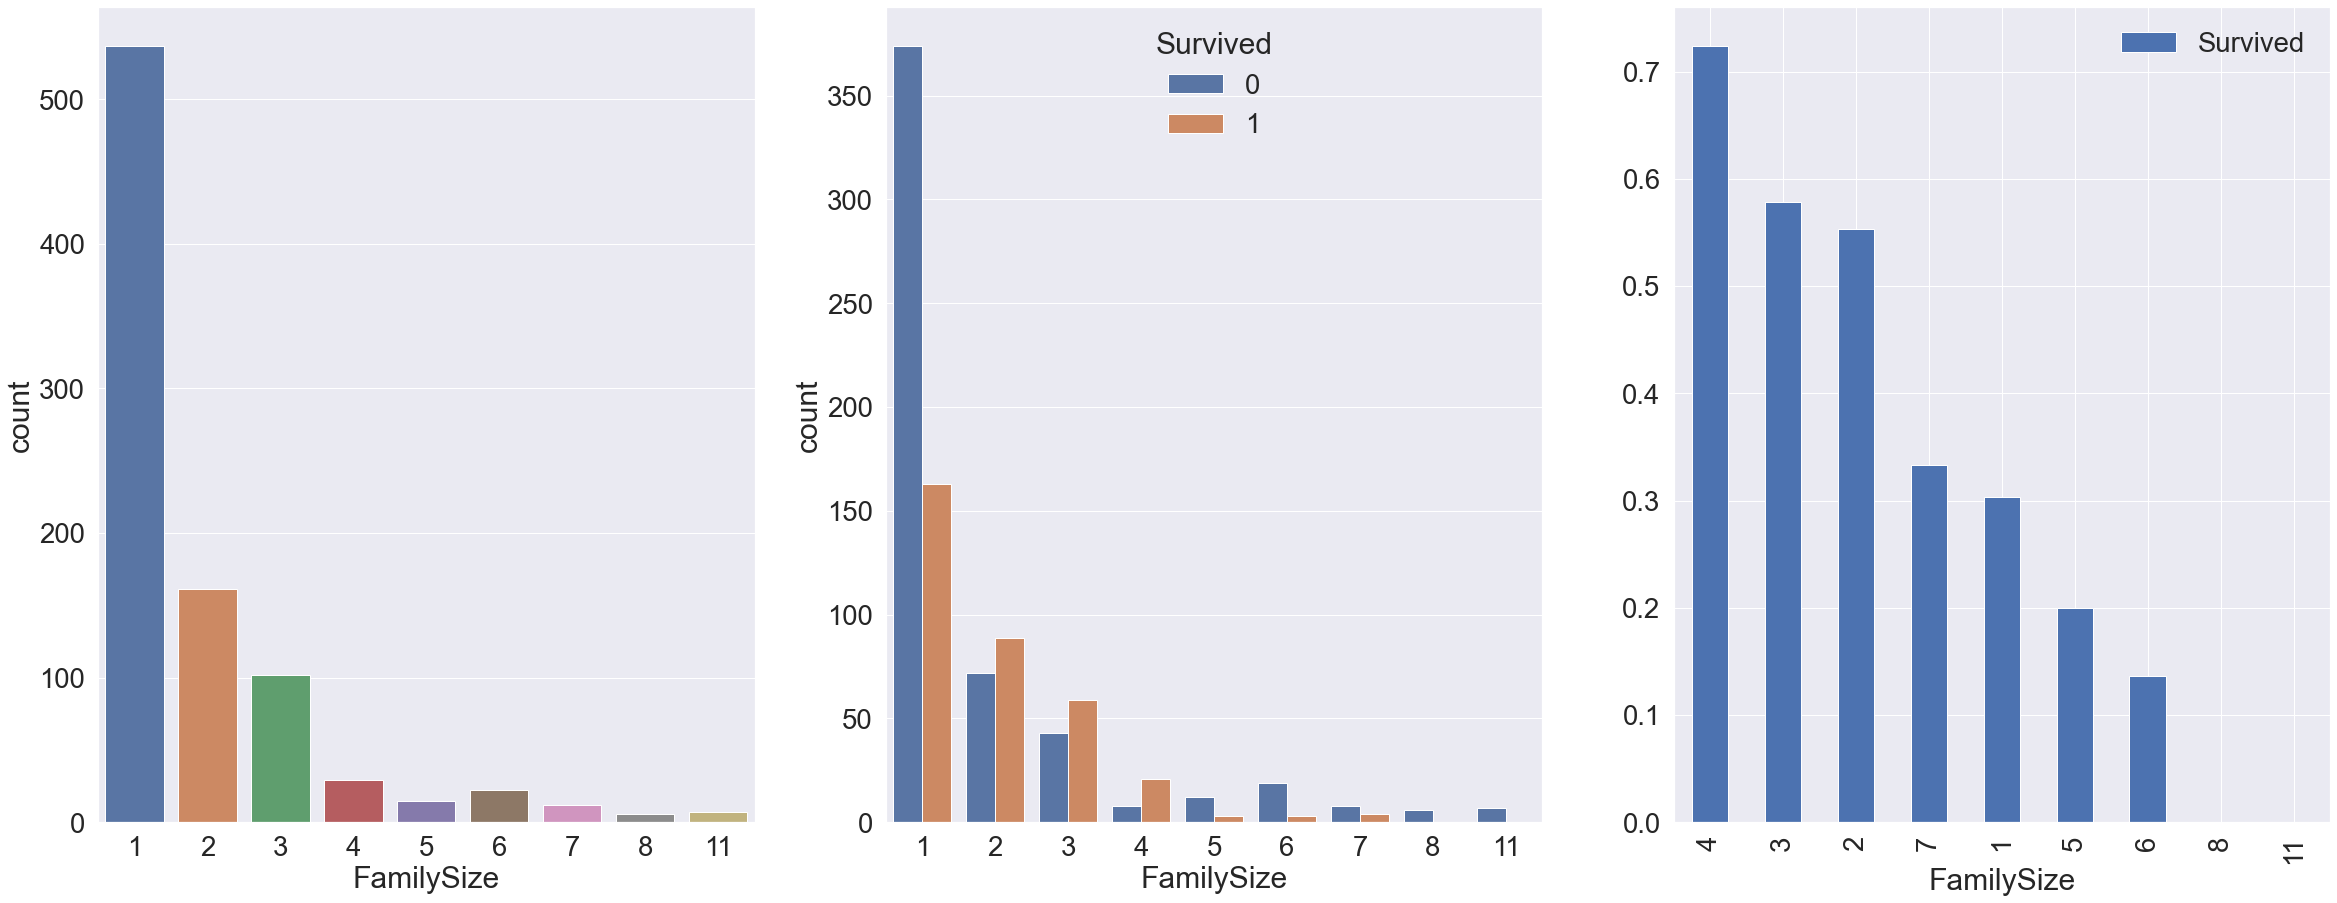

In [30]:
f,ax=plt.subplots(1, 3, figsize=(40,15))
# 가족 크기 그래프
sns.countplot('FamilySize', data=df_train, ax=ax[0])
# 가족 크기에 따른 생존률 그래프
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
# 생존률에 따른 가족 크기 비교 그래프
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])


### Fare : 탑승요금에 따른 생존률

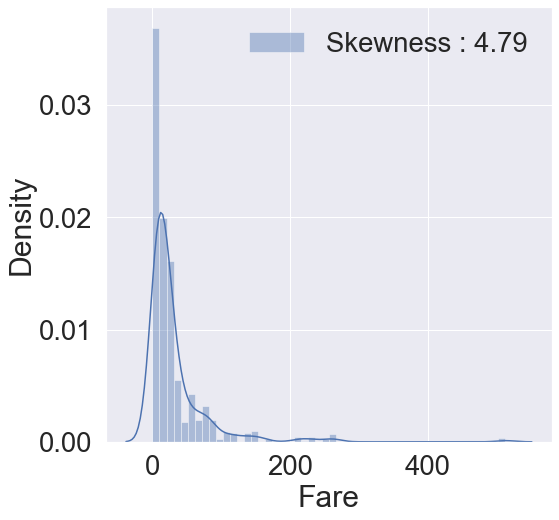

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [32]:
# test에 있는 null값을 평균값으로 치환,,
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

# 비대칭성 제거하기 위한 log 사용
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

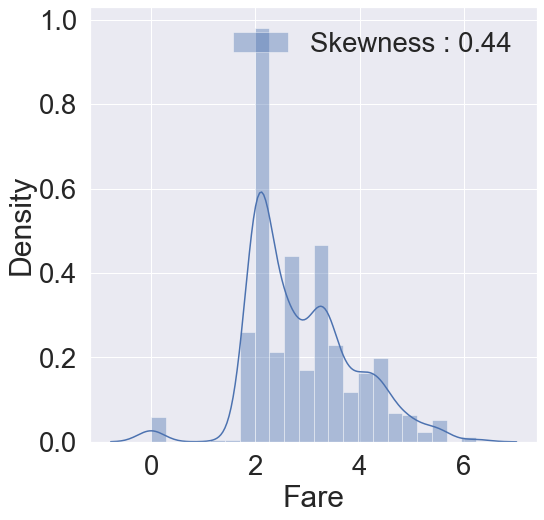

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### Cabin : 객실 넘버에 따른 생존률 (PASS)
- 결측치가 77.1%로 매우 높기 때문에 중요한 요소가 되지 못한다.

In [34]:
df_train["Cabin"].isna().sum() / len(df_train) * 100

77.10437710437711

### Ticket : 티켓 넘버에 따른 생존률 분석

In [35]:
df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

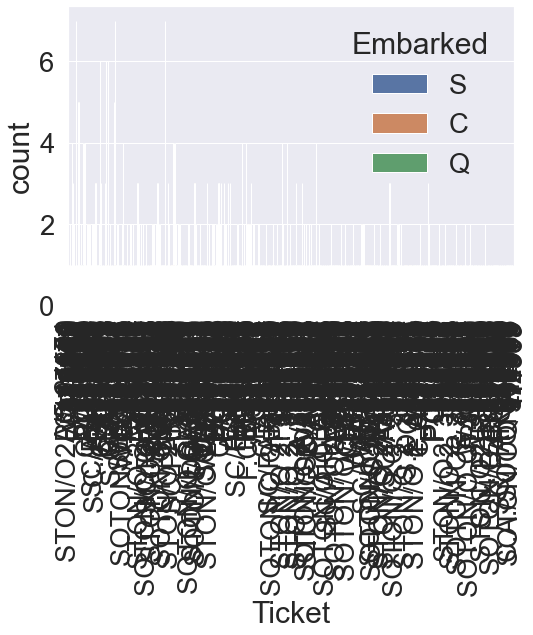

In [36]:
sns.countplot('Ticket', hue='Embarked', data=df_train)
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

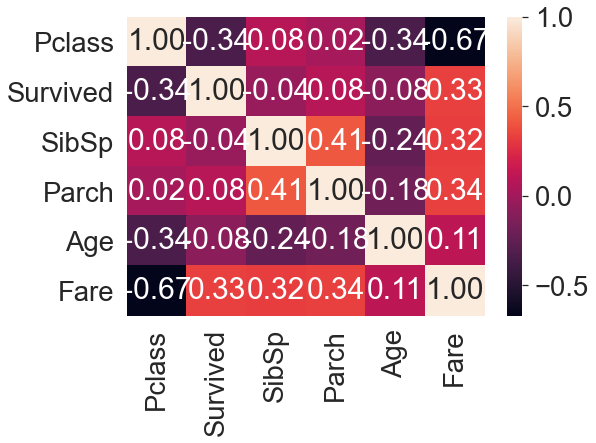

In [70]:
graph = sns.heatmap(df_train[['Pclass', 'Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, fmt='.2f')

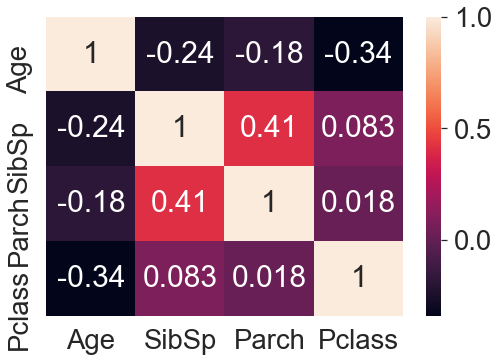

In [72]:
graph2 = sns.heatmap(df_train[['Age', 'Sex', 'SibSp', 'Parch', 'Pclass']].corr(),annot=True)

### Null 값 채우기

In [37]:
# Age, Cabin, Embarked
df_train['Age'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool>

#### AGE

In [38]:
# 나이 data를 채우기 위해 Mrs, Miss, Mr를 이용하기
# 새로운 column 생성 = Name을 string으로 변경, 정규표현식 적용하는 extract method
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [39]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [53]:
# 각 이름을 Miss, Mr, Mrs, Other로 columns명 변경
df_train['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Master','Mile','Mme','Rev','Sir'],
                        ['Mr','Mr','Mrs','Mr','Mr','Mrs','Miss','Mr','Mr','Miss','Miss','Mr','Mr'],inplace=True)

df_train['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Master','Mile','Mme','Rev','Sir'],
                        ['Mr','Mr','Mrs','Mr','Mr','Mrs','Miss','Mr','Mr','Miss','Miss','Mr','Mr'],inplace=True)

In [54]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Miss,412.747312,0.704301,2.284946,22.020000,0.704301,0.537634,3.120704,2.241935
Mr,453.987847,0.189236,2.392361,30.646394,0.430556,0.236111,2.696530,1.666667
Mrs,454.921260,0.795276,1.984252,35.763636,0.685039,0.818898,3.448157,2.503937
Other,671.500000,0.500000,1.000000,58.000000,0.000000,0.000000,3.424281,1.000000


<AxesSubplot:xlabel='Initial'>

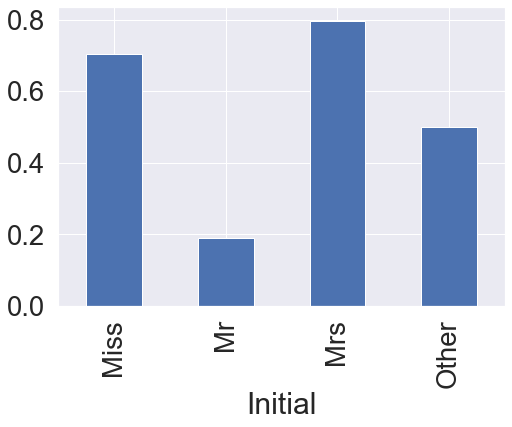

In [55]:
# 성별, 나이에 따른 생존율
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [56]:
# 해당 결측값에 평균 나이값 넣기
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 31
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 58

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 31
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 58

In [57]:
df_train.isnull().sum()  # Age의 null값이 채워졌다

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
Initial          0
dtype: int64

**참고) 나이의 카테고리화**

In [75]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [76]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     62
1    102
2    256
3    308
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

#### EMBARKED

In [73]:
# 가장 많았던 S 항구로 채우기
df_train['Embarked'].fillna('S', inplace=True)

In [74]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
Initial          0
dtype: int64

### 새로운 성별, 나이별 범주를 수치화하기

In [77]:
df_train['Initial'] = df_train['Initial'].map({'Miss': 0, 'Mr': 1, 'Mrs': 2, 'Other': 3})
df_test['Initial'] = df_train['Initial'].map({'Miss': 0, 'Mr': 1, 'Mrs': 2, 'Other': 3})

In [78]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [79]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

**상관관계 분석**

<AxesSubplot:>

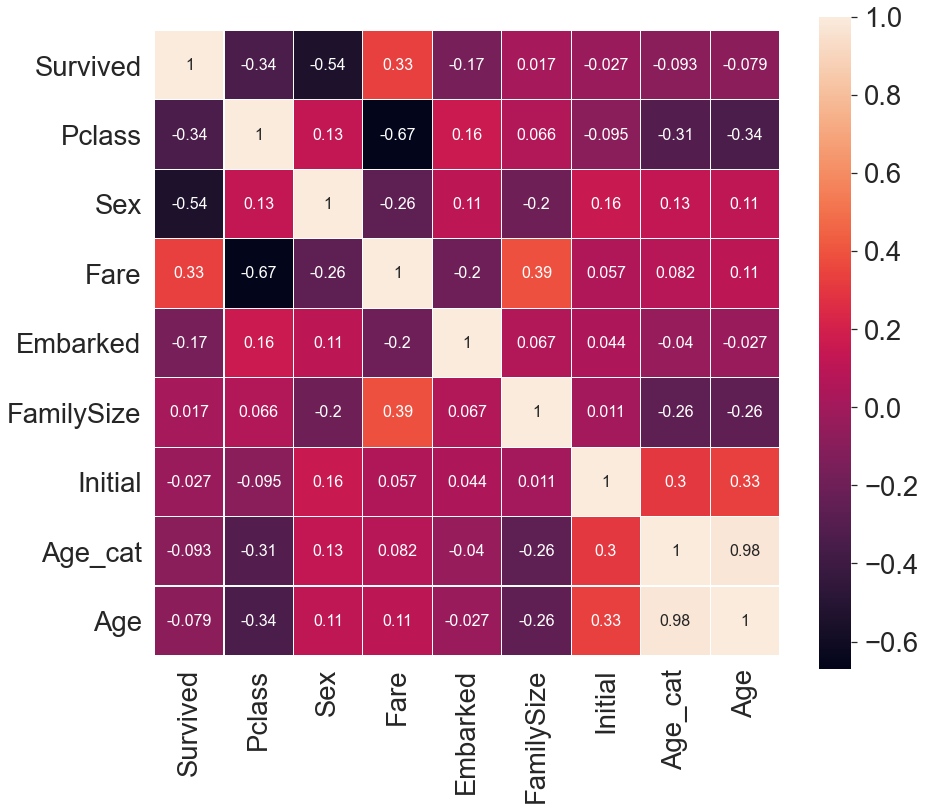

In [82]:
data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

plt.figure(figsize=(14, 12))
sns.heatmap(data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, linecolor='white', annot=True, annot_kws={"size": 16})


### 데이터 전처리

#### One-hot encoding : (0,1)로 이루어진 백터로 나타내는 것
- 각 클래스간의 연관성을 동일하게 만들 수 있다. (클래스 간의 상관 관계 없어짐)

In [83]:
# 새로운 columns가 생겨남 (initial_0 ~ initial_3)
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [84]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,1,0,0


In [85]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

#### 데이터 삭제

In [86]:
# passengerid, name 삭제, sibsp + parch = family size이므로 두개 삭제, Ticket 삭제, Cavbin 결측값 많아서 삭제
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [87]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,1,0,0,0,0,1


In [88]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,1
2,2,1,62.0,2.270836,1,6,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,1


## 모델 예측 및 개발